In [29]:
!python3 -m pip install pandas kagglehub matplotlib numpy scikit-learn imblearn tensorflow-macos tensorflow-metal seaborn


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

In [30]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt

import numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

"""import tensorflow as tf
from keras import Sequential
from keras import Dense"""

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.utils import class_weight

import seaborn as sns

In [2]:
#########################
# Gathering and preparing dataset
#########################

# Load the dataset as a dataframe
data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "nair26/predictive-maintenance-of-machines",
    "CIA-1 Dataset - Dataset (1).csv",
)

# Create learning-dataset
lData = data.copy()

# Delete because UID does not provide relevant information
del lData['UDI']
# Delete becaouse productID information is also contained in 'Type'
del lData['Product ID']

# Convert string columns to numeric ('Type', 'Failure type')
for col in lData.columns:
    if lData[col].dtype == 'object':
        lData[col] = pd.factorize(lData[col])[0]
lData.columns = lData.columns.str.strip()

/var/folders/b8/2pz5n2m96rx5ct8x8mw7ndfh0000gn/T/ipykernel_36038/2520767258.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


Statistics for column: Type
Mean: 0.83
Median: 1.0
Mode: [1]
Standard Deviation: 0.598176923044115
Variance: 0.3578156312625251
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
----------------------------------------
Statistics for column: Air temperature [K]
Mean: 298.09780000000006
Median: 298.1
Mode: [297.4]
Standard Deviation: 0.5630712730348035
Variance: 0.3170492585170343
Q1 (25th percentile): 297.5
Q3 (75th percentile): 298.625
----------------------------------------
Statistics for column: Process temperature [K]
Mean: 308.57640000000004
Median: 308.5
Mode: [308.4]
Standard Deviation: 0.3453716884841793
Variance: 0.11928160320641298
Q1 (25th percentile): 308.3
Q3 (75th percentile): 308.8
----------------------------------------
Statistics for column: Rotational speed [rpm]
Mean: 1540.494
Median: 1498.0
Mode: [1433, 1469, 1512]
Standard Deviation: 193.65824794724338
Variance: 37503.51699799599
Q1 (25th percentile): 1424.75
Q3 (75th percentile): 1604.5
-----------------------

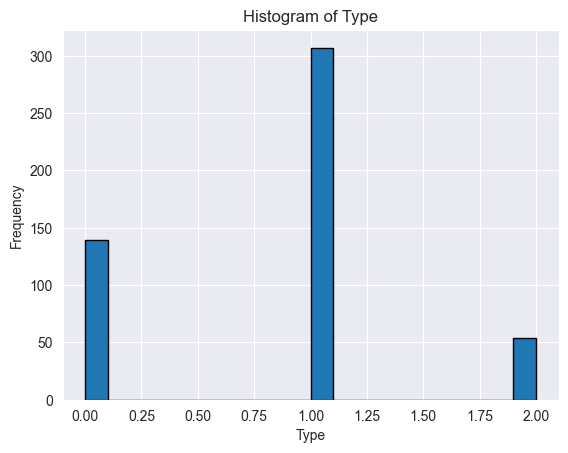

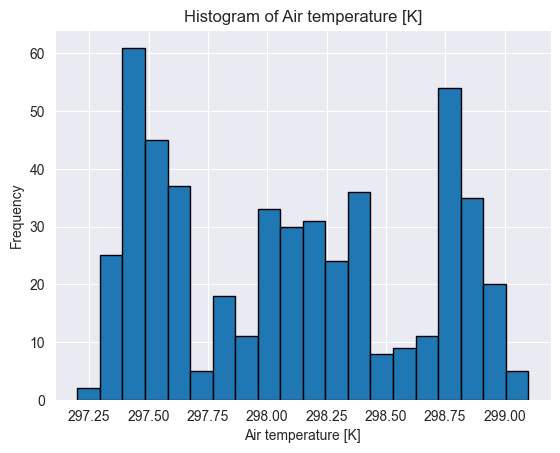

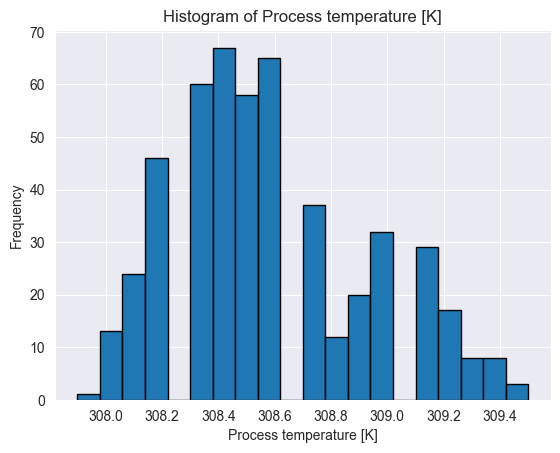

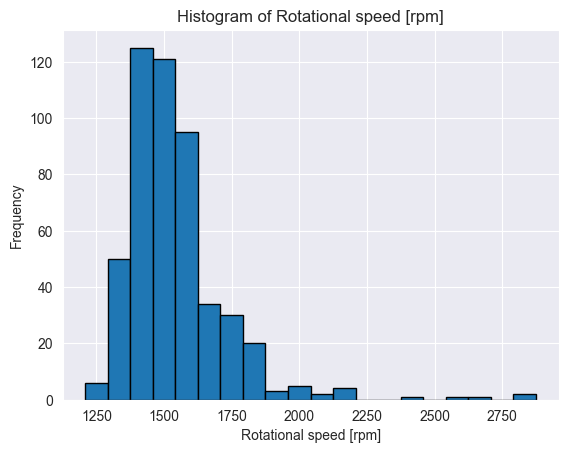

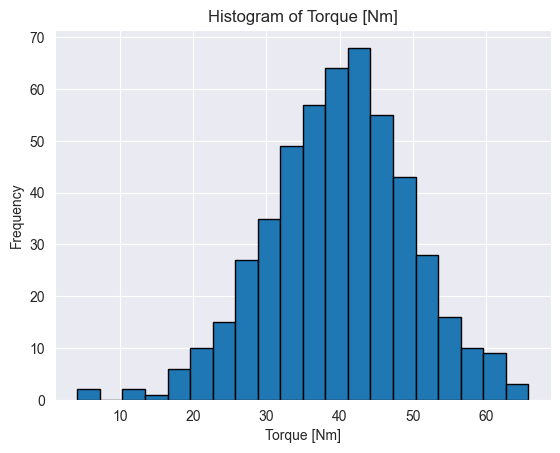

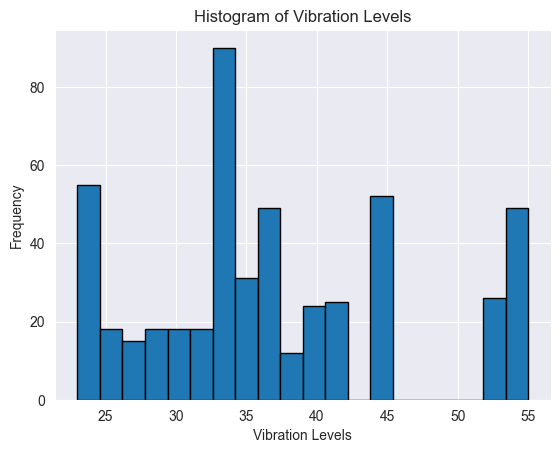

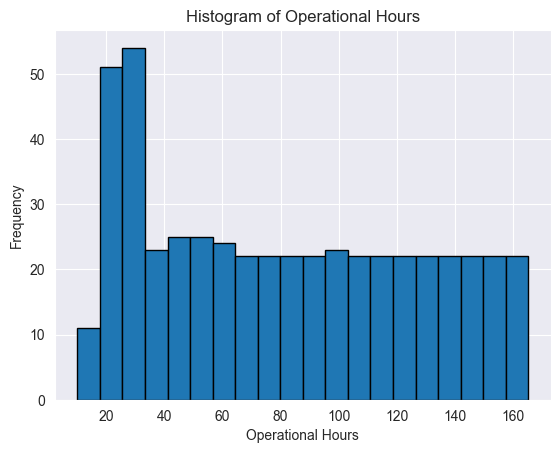

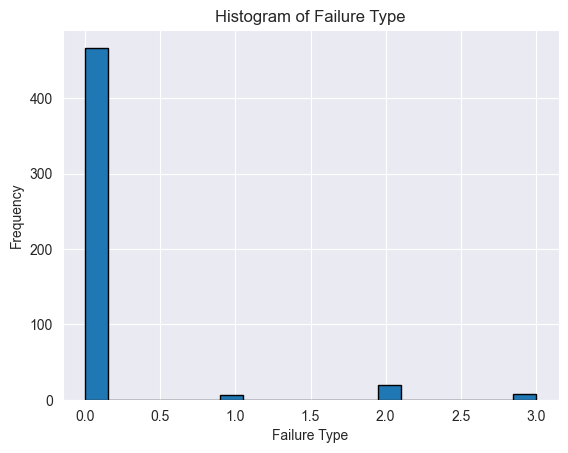

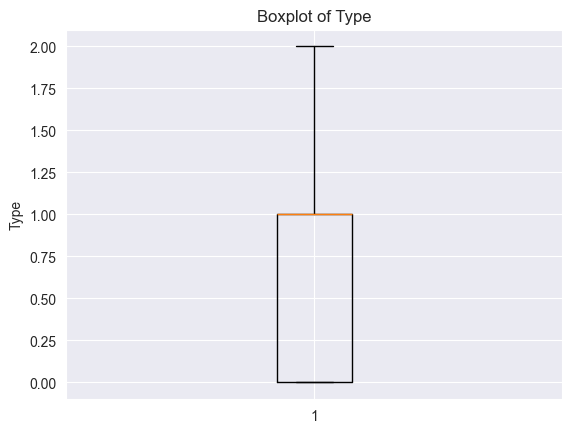

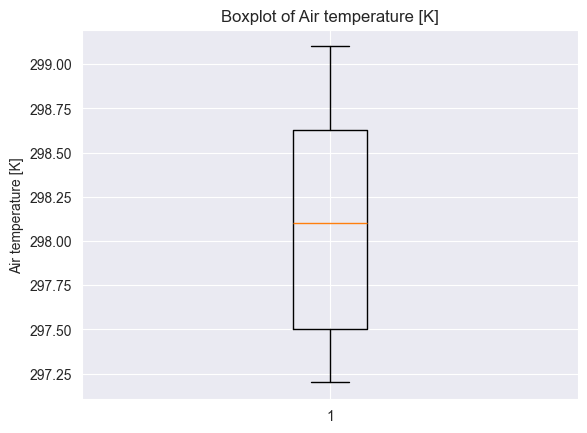

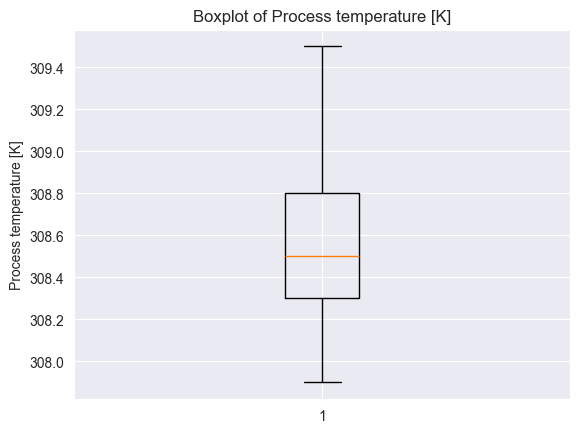

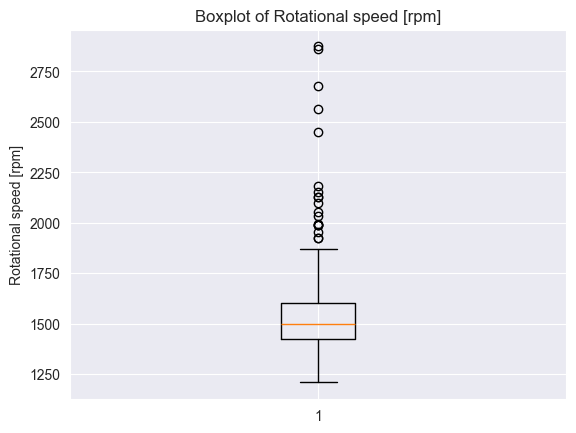

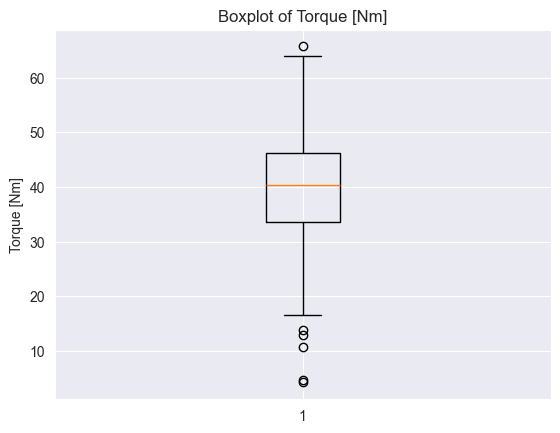

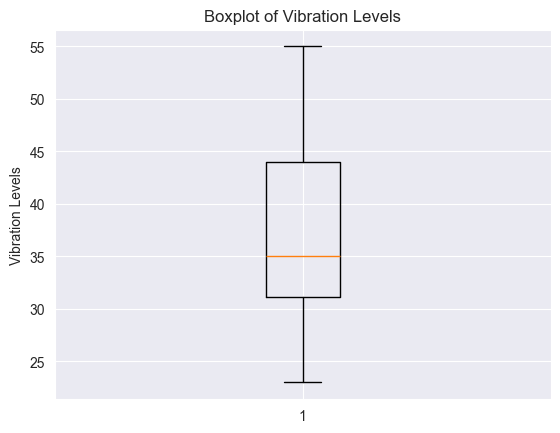

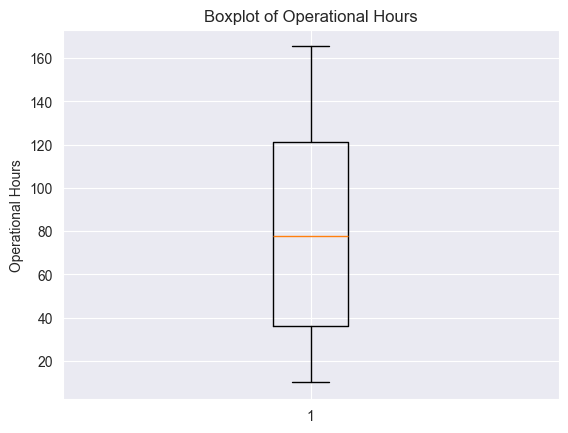

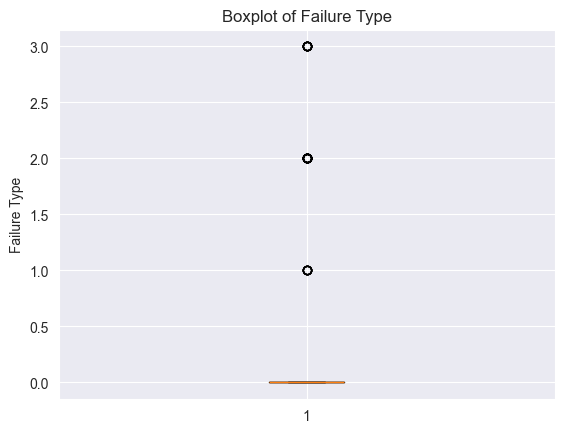

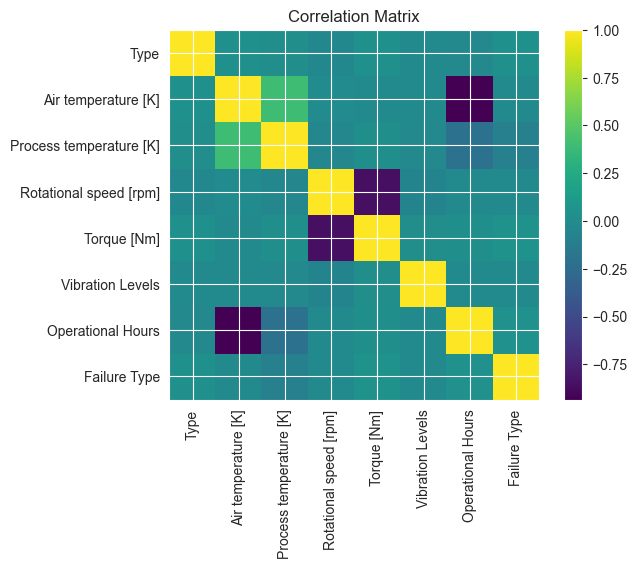

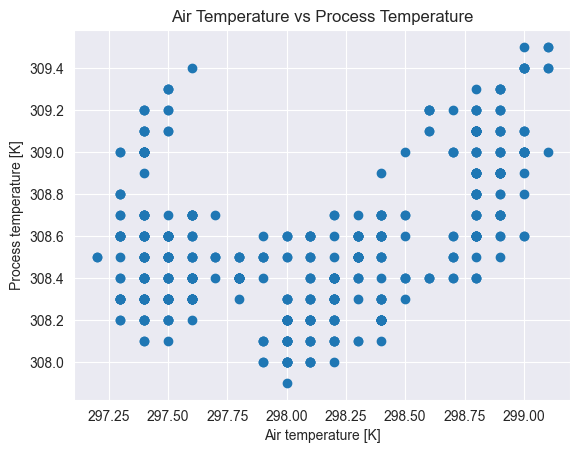

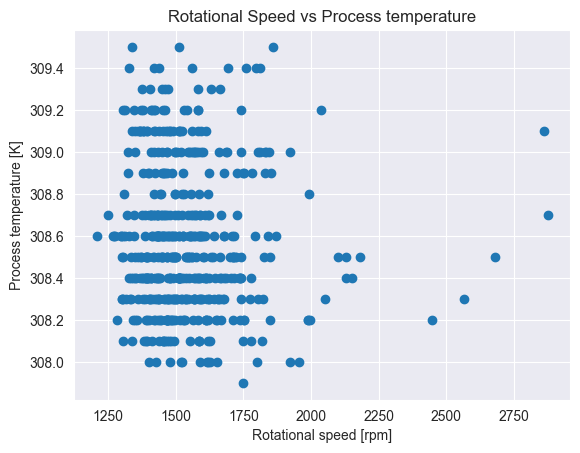

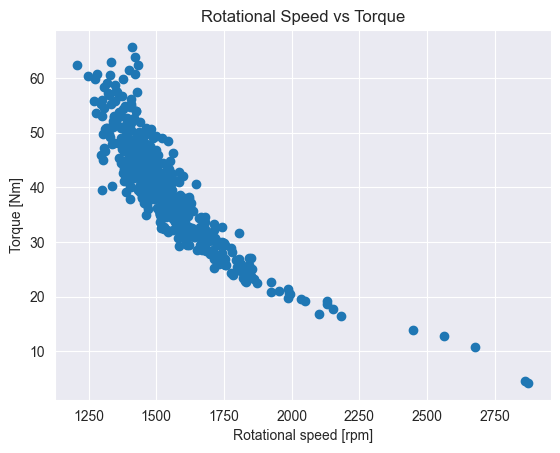

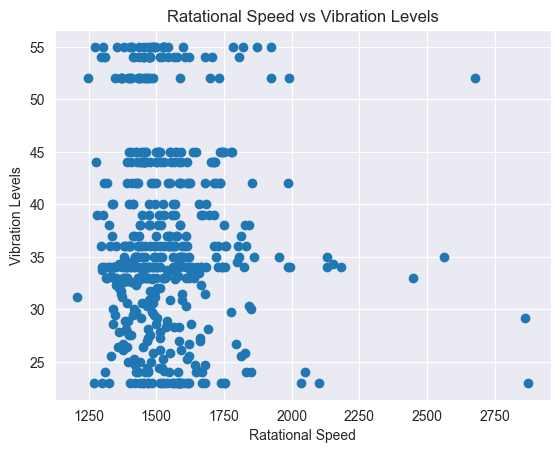

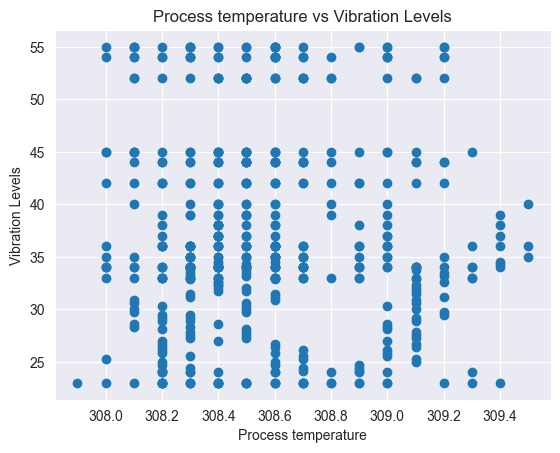

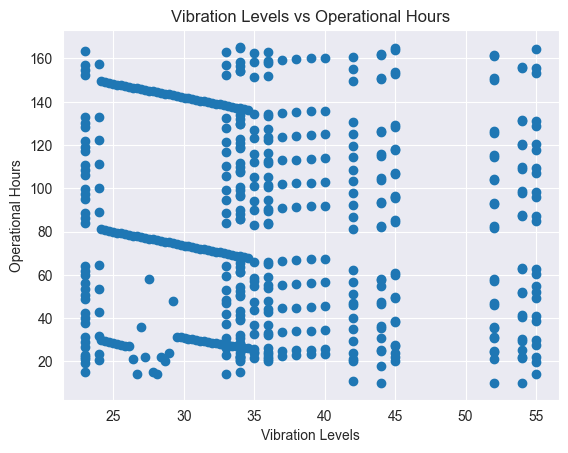

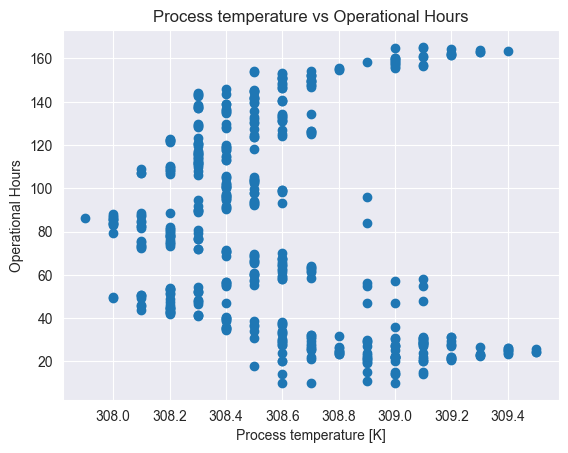

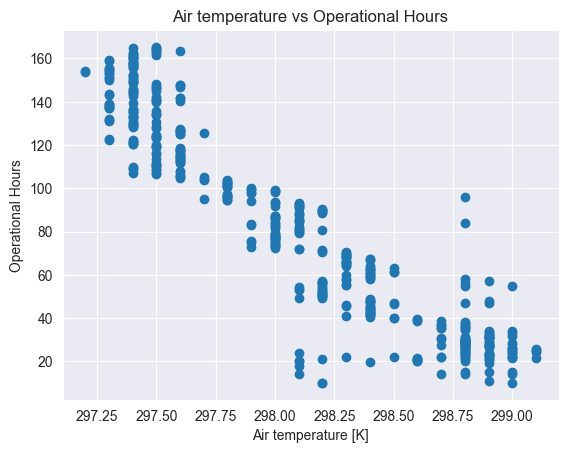

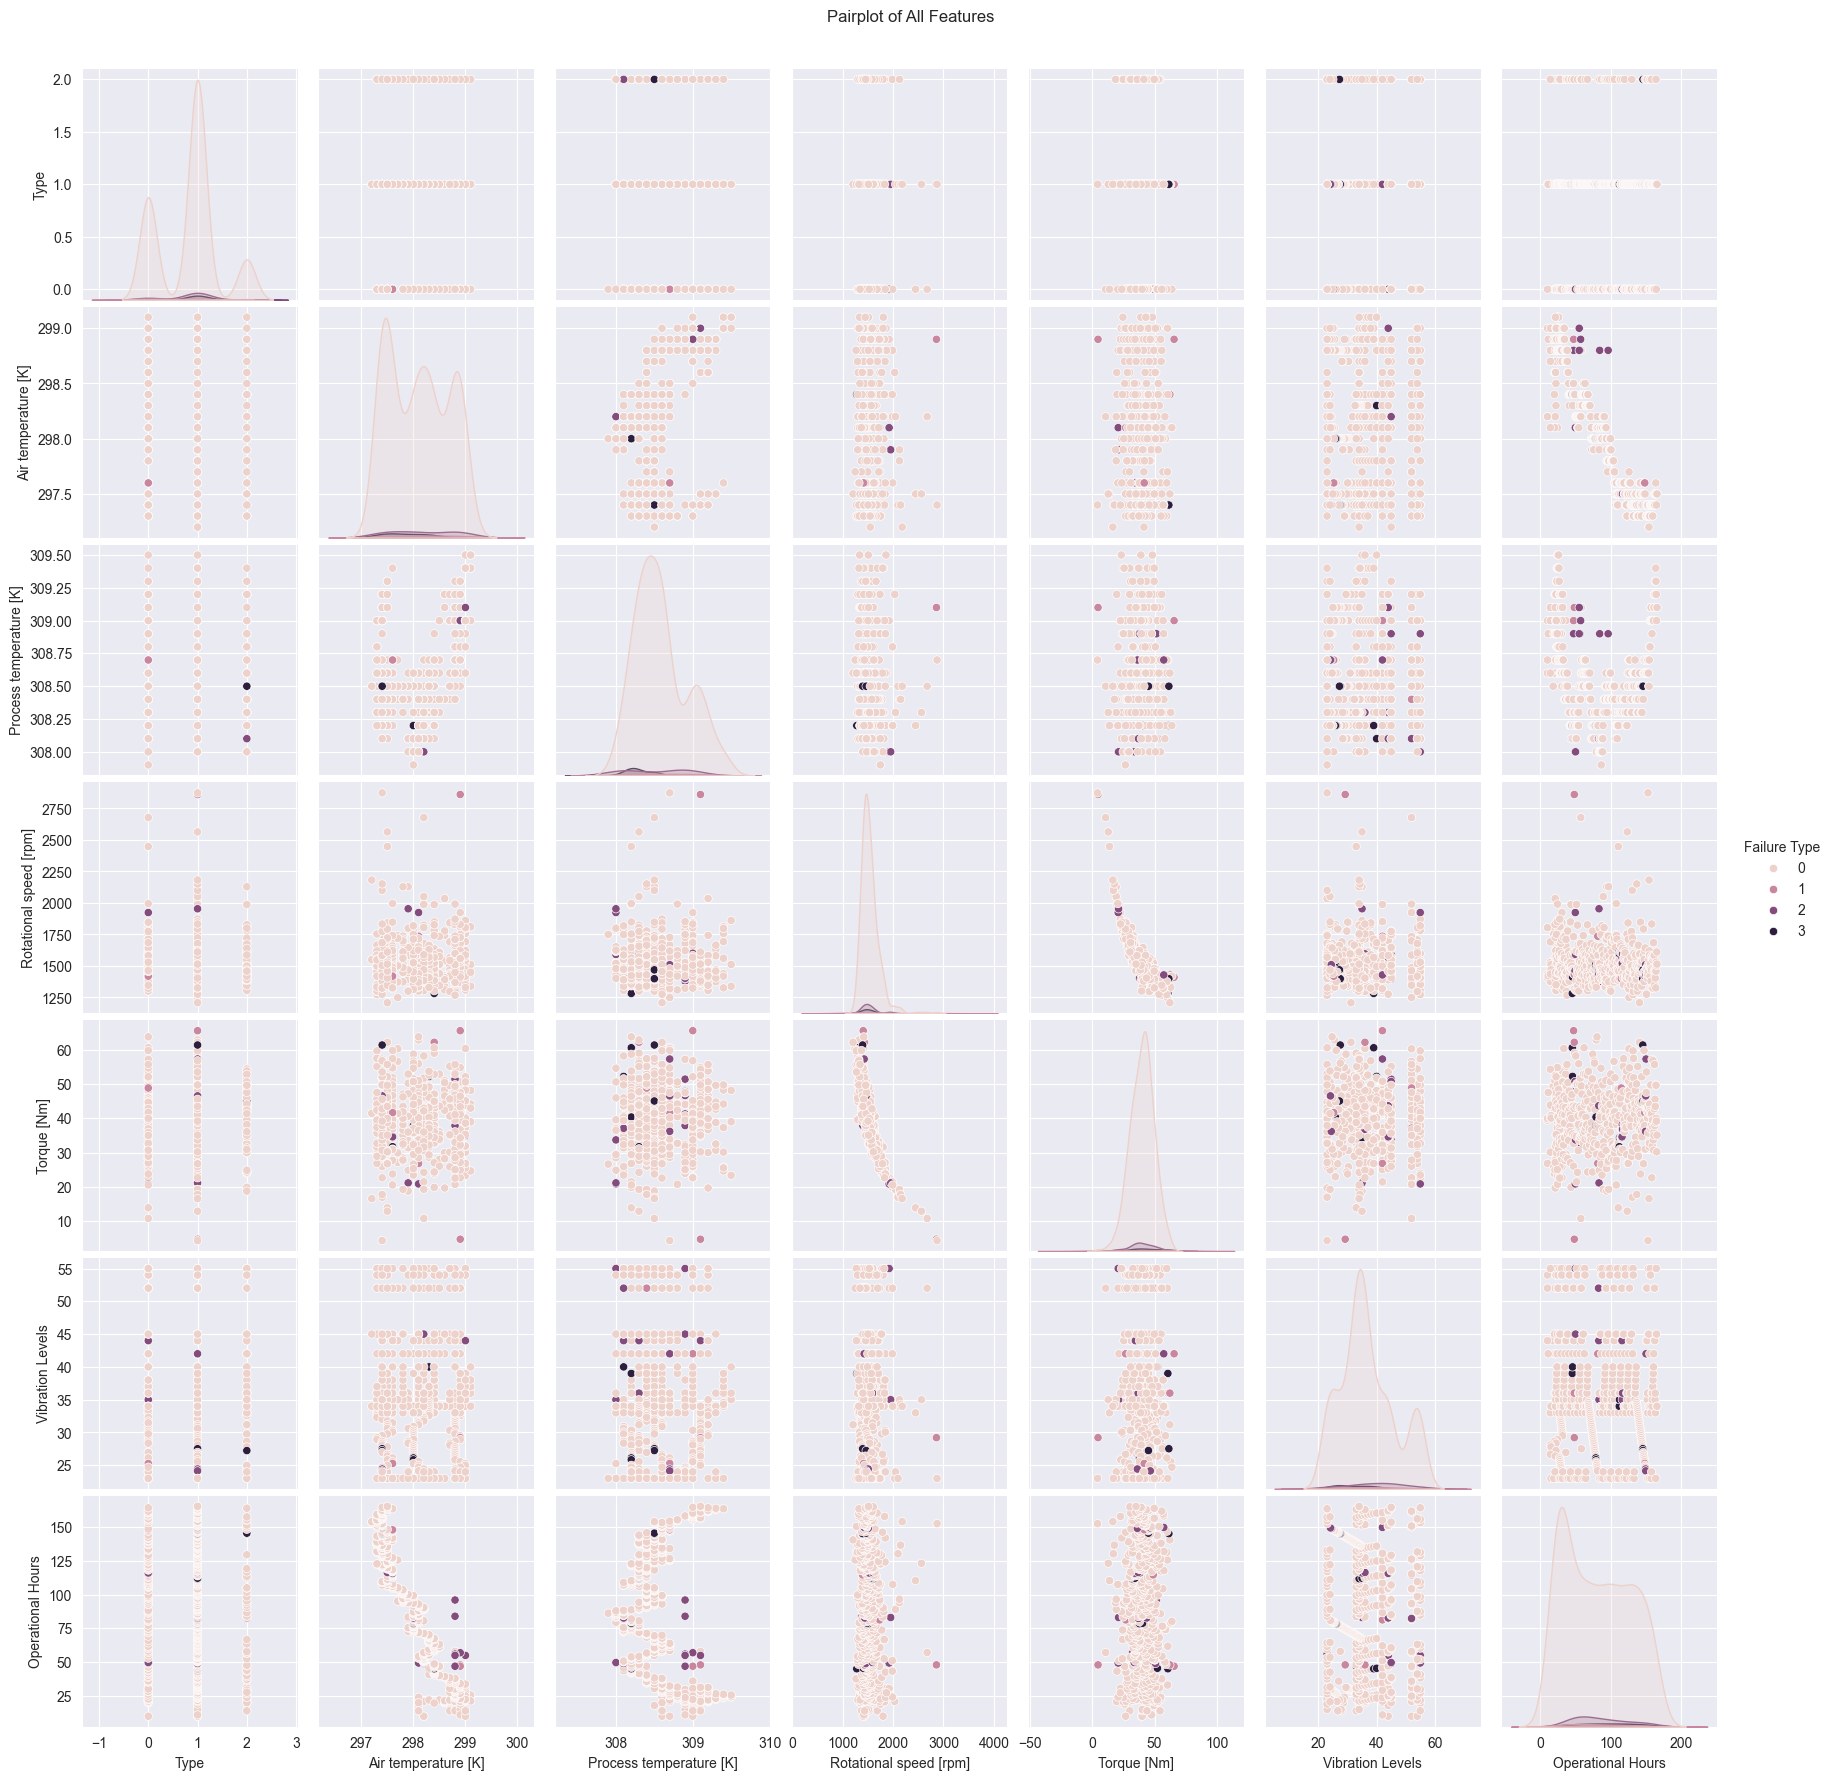

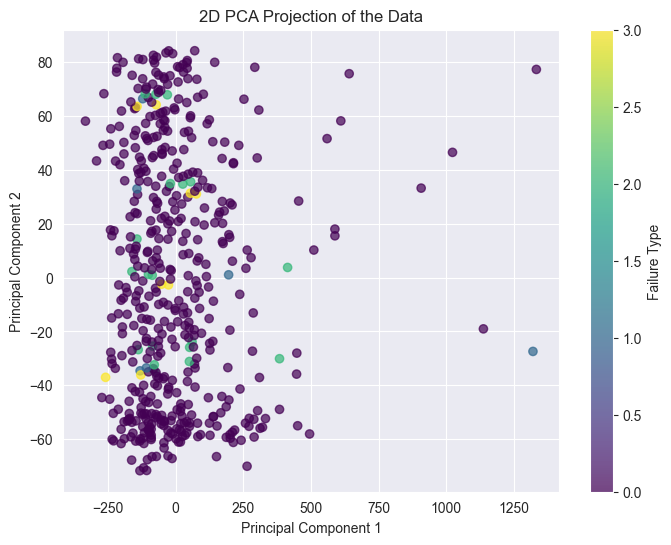

In [7]:
#########################
# Plotting Data ------ BY CHAT GPT
#########################

# Statistics for each collumn
for col in lData.select_dtypes(include='number').columns:
    mean = lData[col].mean()
    median = lData[col].median()
    mode = lData[col].mode().tolist()  # Mode might be multiple values
    std_dev = lData[col].std()
    variance = lData[col].var()
    q1 = lData[col].quantile(0.25)
    q3 = lData[col].quantile(0.75)

    print(f"Statistics for column: {col}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print("-" * 40)


#Plot histograms for each column to check distributions
for col in lData.columns:
    plt.figure()
    plt.hist(lData[col], bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Plot boxplots for each column to identify outliers
for col in lData.columns:
    plt.figure()
    plt.boxplot(lData[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


# Correlation matrix heatmap to visualize inter-feature relationships
corr = lData.corr()
plt.figure()
plt.imshow(corr, cmap='viridis', interpolation='none')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


# Scatter plot: Air Temperature vs Process Temperature
plt.figure()
plt.scatter(lData['Air temperature [K]'], lData['Process temperature [K]'])
plt.title('Air Temperature vs Process Temperature')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.show()
# Scatter plot: Rotational Speed vs Process temperature
plt.figure()
plt.scatter(lData['Rotational speed [rpm]'], lData['Process temperature [K]'])
plt.title('Rotational Speed vs Process temperature')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Process temperature [K]')
plt.show()
# Scatter plot: Rotational Speed vs Torque
plt.figure()
plt.scatter(lData['Rotational speed [rpm]'], lData['Torque [Nm]'])
plt.title('Rotational Speed vs Torque')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()
# Scatter plot: Rotational speed vs Vibration Levels
plt.figure()
plt.scatter(lData['Rotational speed [rpm]'], lData['Vibration Levels'])
plt.title('Ratational Speed vs Vibration Levels')
plt.xlabel('Ratational Speed')
plt.ylabel('Vibration Levels')
plt.show()
# Scatter plot: Process temperature vs Vibration Levels
plt.figure()
plt.scatter(lData['Process temperature [K]'], lData['Vibration Levels'])
plt.title('Process temperature vs Vibration Levels')
plt.xlabel('Process temperature')
plt.ylabel('Vibration Levels')
plt.show()
# Scatter plot: Vibration Levels vs Operational Hours
plt.figure()
plt.scatter(lData['Vibration Levels'], lData['Operational Hours'])
plt.title('Vibration Levels vs Operational Hours')
plt.xlabel('Vibration Levels')
plt.ylabel('Operational Hours')
plt.show()
# Scatter plot: Process temperature vs Operational Hours
plt.figure()
plt.scatter(lData['Process temperature [K]'], lData['Operational Hours'])
plt.title('Process temperature vs Operational Hours')
plt.xlabel('Process temperature [K]')
plt.ylabel('Operational Hours')
plt.show()
# Scatter plot: Air temperature vs Operational Hours
plt.figure()
plt.scatter(lData['Air temperature [K]'], lData['Operational Hours'])
plt.title('Air temperature vs Operational Hours')
plt.xlabel('Air temperature [K]')
plt.ylabel('Operational Hours')
plt.show()

# --- Option 1: Pairplot ---
# This creates scatter plots for every pair of features, colored by Failure Type.
sns.pairplot(lData, hue="Failure Type")
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()

# --- Option 2: PCA Projection ---
# Reduce dimensionality to 2 components for easier visualization.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(lData)

plt.figure(figsize=(8, 6))
# Using the numeric 'Failure Type' to color points.
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=lData["Failure Type"], cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of the Data")
plt.colorbar(label="Failure Type")
plt.show()

In [3]:
#########################
# Prepare training and test sets for model
#########################

# Remove 'Rotational speed' (grouped with 'Torque)
del lData['Rotational speed [rpm]']

# Separate features and target
X = lData.drop("Failure Type", axis=1)
y = lData["Failure Type"]
y_binary = y.copy()
y_binary[y_binary != 0] = 1

# Split into training and test sets (80/20 split with stratifying to ensure class representation)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Apply SMOTE to training data
smote = SMOTE(random_state=42, k_neighbors=4)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/Users/admin/PycharmProjects/AssignmentE/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [9]:
#########################
# Print out class distribution for sets
#########################

l_counts = pd.Series(y).value_counts().sort_index()
train_counts = pd.Series(y_train).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()

print("distribution in learning :")
for cls, count in l_counts.items():
    print(f"{cls}: {count}")

print("\ndistribution in training :")
for cls, count in train_counts.items():
    print(f" {cls}: {count}")

print("\ndistribution in test:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")

distribution in learning :
0: 467
1: 6
2: 19
3: 8

distribution in training :
 0: 374
 1: 26

distribution in test:
0: 93
1: 7


In [10]:
#########################
# Decision tree (Help from chatGPT)
#########################

# Create and train decision tree with training set
dtModel = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2, criterion='entropy', class_weight='balanced', random_state=42)
dtModel.fit(X_train_resampled, y_train_resampled)

# Predict with test set
yPredDt = dtModel.predict(X_test)

# Printout
print("Report:")
print(classification_report(y_test, yPredDt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, yPredDt))

Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83        93
           1       0.16      0.71      0.26         7

    accuracy                           0.72       100
   macro avg       0.57      0.72      0.55       100
weighted avg       0.91      0.72      0.79       100

Confusion Matrix:
[[67 26]
 [ 2  5]]


In [28]:
#########################
# ANN (Help from chatGPT)
#########################

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Scaling input features, so they have standard mean and variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model definition (one input layer, 4 hidden reLu layers, one binary output layer)
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Complating teh model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Apply class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Model fitting
model.fit(X_train_scaled, y_train, epochs=50, batch_size=24, verbose=1, class_weight=class_weights_dict)

# Predict with test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)


# Printout
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4943 - loss: 0.6967
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4824 - loss: 0.6885
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3842 - loss: 0.6361
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3974 - loss: 0.6722
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3682 - loss: 0.5979
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4380 - loss: 0.7121
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4324 - loss: 0.7261
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4693 - loss: 0.6442
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4362 - loss: 0.6069
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4521 - loss: 0.6236
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4571 - loss: 0.6511
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy:

In [ ]:
#########################
# Scaling input features
#########################

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#########################
# K-means
#########################

# Run experiments for 5 k values
for k in [2, 3, 4, 5, 6]:
    # Model definition
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # create PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot PCA
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2')
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()

    # Print silhouette score
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Silhouette Score: {score:.2f}, for k={k}")

# Comparrison of clusters with binary classes for k=2

# Model definition
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

# Cluster assignments
y_cluster = kmeans.labels_

# The labels from k-means may be flipped, so check both mappings
acc_1 = accuracy_score(y_binary, y_cluster)
acc_2 = accuracy_score(y_binary, 1 - y_cluster)

best_acc = max(acc_1, acc_2)
print(f"Best accuracy after label alignment: {best_acc:.2f}")

ari = adjusted_rand_score(y_binary, y_cluster)
print(f"Adjusted Rand Index: {ari:.2f}")

In [ ]:
#########################
# DBSCAN
#########################


# Model definition
dbscan = DBSCAN(eps=0.65, min_samples=6)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Create PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='Set1')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()